In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from numpy import pi ,cos,sin,tan,arcsin,arccos,arctan,real,imag,exp,conj

In [2]:
# -*- coding: utf-8 -*-


def inter_line_line(Z1, Z2, Z3, Z4):
    """INTER_LINE_LINE find the intersection between two lines defined by two
    complex

    Parameters
    ----------
    Z1 : complex
        Complex coordinate of a point on the first line
    Z2 : complex
        Complex coordinate of another point on the first line
    Z3 : complex
        Complex coordinate of a point on the second line
    Z4 : complex
        Complex coordinate of another point on the second line

    Returns
    -------
        Zlist: list
            List of the complex coordinates of the intersection
            return [Z1, Z2] if the 4 points are aligned
    """

    # Check if the points are aligned
    Z12 = Z1 - Z2
    Z13 = Z1 - Z3
    Z14 = Z1 - Z4
    if (
        Z12.real * Z13.imag - Z12.imag * Z13.real == 0
        and Z12.real * Z14.imag - Z12.imag * Z14.real == 0
    ):
        return [Z1, Z2]

    # Compute the line equation
    (A1, B1, C1) = find_line_eq(Z1, Z2)
    (A2, B2, C2) = find_line_eq(Z3, Z4)
    # Compute the intersection
    D = A1 * B2 - B1 * A2
    Dx = C1 * B2 - B1 * C2
    Dy = A1 * C2 - C1 * A2
    if D != 0:
        x = Dx / D
        y = Dy / D
        return [x + 1j * y]
    else:
        return []


def find_line_eq(Z1, Z2):
    """Find the line equation (Ax+By=C)

    Parameters
    ----------
    Z1 : complex
        Complex coordinate of a point on the line
    Z2 : complex
         Complex coordinate of another point on the line

    Returns
    -------
    A, B, C : (float, float, float)
        Line equation parameters
    """
    A = Z1.imag - Z2.imag
    B = Z2.real - Z1.real
    C = Z1.real * Z2.imag - Z2.real * Z1.imag
    return (A, B, -C)


In [3]:

from numpy import sqrt, abs as np_abs


def inter_line_circle(Z1, Z2, R, Zc=0):
    """INTER_LINE_CIRCLE find the intersection between a circle of center Zc
    and radius r with a line defined by two points

    Parameters
    ----------
    Z1 : complex
        Complex coordinate of a point on the line

    Z2 : complex
        Complex coordinate of another point on the line
    R : float
        Radius of the circle [m]
    Zc : complex
        Complex coordinate of the center

    Returns
    -------
    Zlist: list
        List of the complex coordinates of the intersection
    """
    # Set the coordinate system on the circle center
    if np_abs(Zc) > 1e-6:
        Z1 = Z1 - Zc
        Z2 = Z2 - Zc
    else:
        Zc = 0

    x1 = Z1.real
    y1 = Z1.imag
    x2 = Z2.real
    y2 = Z2.imag

    dx = x2 - x1
    dy = y2 - y1
    dr = sqrt(dx ** 2 + dy ** 2)
    D = x1 * y2 - x2 * y1

    delta = R ** 2 * dr ** 2 - D ** 2
    if delta < 0:  # 0 point
        return list()
    elif delta == 0:  # 1 point(tangent)
        return [(D * dy - 1j * D * dx) / dr ** 2 + Zc]

    else:  # 2 points
        if dy < 0:
            xs1 = (D * dy - dx * sqrt(delta)) / dr ** 2
            xs2 = (D * dy + dx * sqrt(delta)) / dr ** 2
        else:
            xs1 = (D * dy + dx * sqrt(delta)) / dr ** 2
            xs2 = (D * dy - dx * sqrt(delta)) / dr ** 2
        ys1 = (-D * dx + abs(dy) * sqrt(delta)) / dr ** 2
        ys2 = (-D * dx - abs(dy) * sqrt(delta)) / dr ** 2

        return [xs1 + 1j * ys1 + Zc, xs2 + 1j * ys2 + Zc]


In [4]:
bore_dia=138
air_gap=0.88
bridge_thickness=1.65
web_length=1.5
web_thickness=8
pole_angle=124.5/180*pi
Vangle=103.7/180*pi
magnet_sep=6.6
post=2.87
magnet_thickness=4.2
magnet_width=16.4
gap_inner=0.15
gap_outer=0
corner_offset_l1=[0.05,0,0.05,0,0.05,0,0.05,0]
corner_offset_l2=[0.05,0,0,0.05]
angular_offset=[10*exp(1j*9*pi/8),10*exp(-1j*pi/8),]
post_offset=[0.5,0.5]


In [5]:
r1=bore_dia/2-air_gap-bridge_thickness

Z0=r1*exp(1j*(pi/8-arcsin(web_thickness/2/r1) ))
Z1=Z0-web_length*exp(1j*pi/8)
Z14=r1*exp(1j*(pole_angle/8))

In [6]:
a,b,c=find_line_eq(Z14,Z14+100*exp(1j*Vangle/2))
Z8=(c-b*post/2)/a+1j*post/2
c2=gap_outer*(sqrt(a**2+b**2))+c
M1=(c2-b*magnet_sep/2)/a+1j*magnet_sep/2
M2=M1+magnet_width*exp(1j*Vangle/2)
M3=M2+magnet_thickness*exp(1j*(Vangle+pi)/2)
M4=M1+magnet_thickness*exp(1j*(Vangle+pi)/2)
M11=M1+gap_outer*exp(1j*(Vangle-pi)/2)
M21=M2+gap_outer*exp(1j*(Vangle-pi)/2)
M31=M3+gap_inner*exp(1j*(Vangle+pi)/2)
M41=M4+gap_inner*exp(1j*(Vangle+pi)/2)
Z11=M11+corner_offset_l1[0]*magnet_width*exp(1j*Vangle/2)
Z12=M11+corner_offset_l1[1]*magnet_width*exp(1j*Vangle/2) 
Z13=M21+corner_offset_l1[2]*magnet_width*exp(1j*Vangle/2)
Z14=M21+corner_offset_l1[3]*magnet_width*exp(1j*Vangle/2) 
Z2=M31+corner_offset_l1[5]*magnet_width*exp(1j*Vangle/2) 
Z3=M41+corner_offset_l1[6]*magnet_width*exp(1j*Vangle/2)
Z4=M41+corner_offset_l1[7]*magnet_width*exp(1j*Vangle/2) 
Z5=Z4+angular_offset[0]
Z10=Z11+angular_offset[1]
a,b,c=find_line_eq(Z2,Z3)
Z7=(c-b*post/2)/a+1j*post/2
Z6=Z7-post_offset[0]
Z9=Z8+post_offset[1]

In [7]:
def quin_bez(Z1,Z2,Z3,Z4,Z5,t):
    one_t=1-t
    Zt=one_t**4*Z1+4*t*one_t**3*Z2+6*t**2*one_t**2*Z3+4*t**3*one_t*Z4++t**4*Z5
    return Zt

In [8]:
Z2

(59.32695013361524+18.883990926398575j)

In [9]:
quin_bez(Z13,Z14,Z0,Z1,Z2,1)

(59.32695013361524+18.883990926398575j)

In [10]:
Z_pocket=[]

for i in np.linspace(0,1,10,True):
    Z_pocket.append(quin_bez(Z13,Z14,Z0,Z1,Z2,i))

for i in np.linspace(0,1,10,True):
    Z_pocket.append(quin_bez(Z3,Z4,Z5,Z6,Z7,i))

for i in np.linspace(0,1,10,True):
    Z_pocket.append(quin_bez(Z8,Z9,Z10,Z11,Z12,i))

Z_pocket.append(Z13)


Z_mag=[M1,M2,M3,M4,M1]
Z_pocket_2=[]
Z_mag_2=[]
for i in Z_pocket:Z_pocket_2.append(np.conjugate(i))
for i in Z_mag:Z_mag_2.append(np.conjugate(i))

In [11]:
x_mag=[]
y_mag=[]
x_pocket=[]
y_pocket=[]
x_mag_2=[]
y_mag_2=[]
x_pocket_2=[]
y_pocket_2=[]

for i in Z_mag:
    x_mag.append(np.real(i))
    y_mag.append(np.imag(i))
for i in Z_pocket:
    x_pocket.append(np.real(i))
    y_pocket.append(np.imag(i))    
for i in Z_mag_2:
    x_mag_2.append(np.real(i))
    y_mag_2.append(np.imag(i))
for i in Z_pocket_2:
    x_pocket_2.append(np.real(i))
    y_pocket_2.append(np.imag(i))    
theta=np.linspace(-pi/8,pi/8,20)
x_r=[0]
y_r=[0]
for i in theta:
    x_r.append(np.real((bore_dia/2-air_gap)*exp(1j*i)))
    y_r.append(np.imag((bore_dia/2-air_gap)*exp(1j*i)))
x_r.append(0)
y_r.append(0)

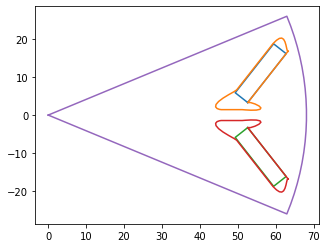

In [12]:
plt.plot(x_mag,y_mag)
plt.plot(x_pocket,y_pocket)

plt.plot(x_mag_2,y_mag_2)
plt.plot(x_pocket_2,y_pocket_2)
plt.plot(x_r,y_r)

ax = plt.gca()

ax.set_aspect('equal', adjustable='box')